In [30]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline


read_dataset

In [4]:
wine_data = pd.read_csv(fr"C:\Users\TESTING\Downloads\archive (1)\winequality-red.csv")


In [5]:
#chek missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data .head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\TESTING\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


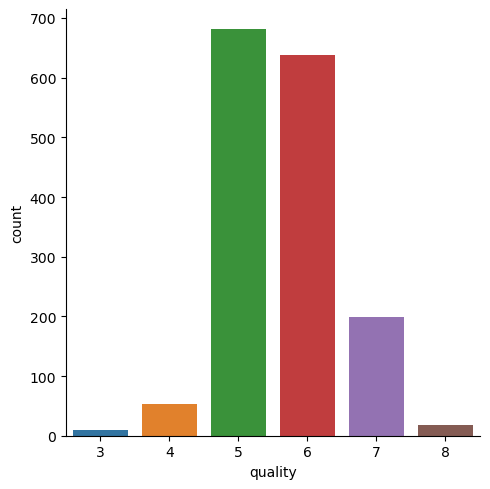

In [8]:
sns.catplot(x='quality',data=wine_data, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

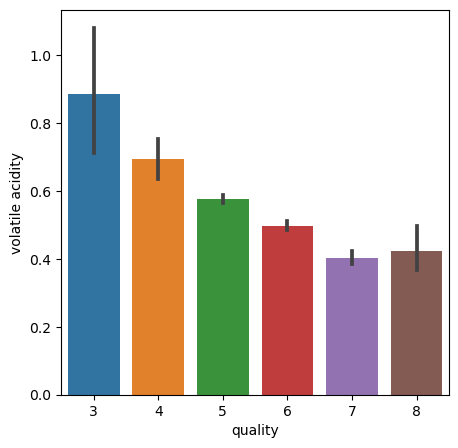

In [9]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='alcohol'>

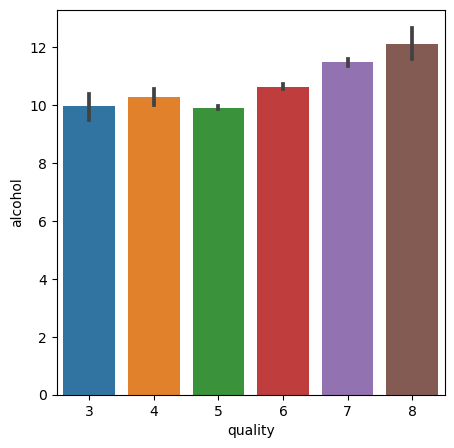

In [14]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'alcohol',data=wine_data)

In [21]:
#corelation
correclation = wine_data.corr()

<Axes: >

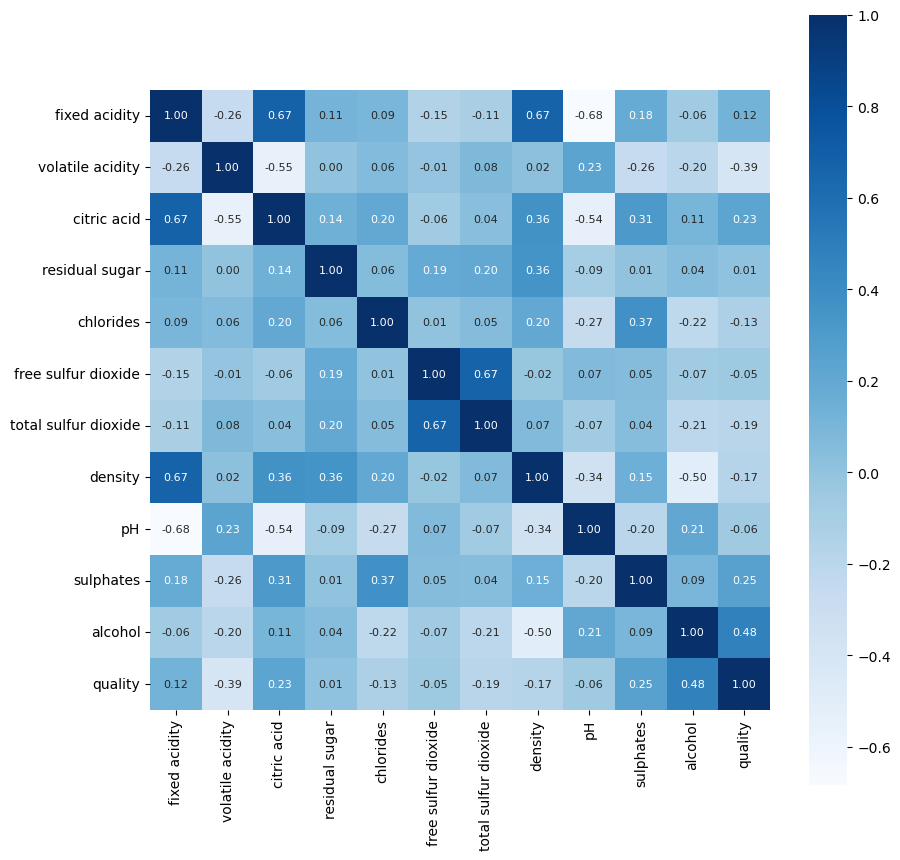

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correclation, cbar=True,square=True, fmt = '.2f',annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [24]:
#label binirazation
y=wine_data['quality'].apply(lambda y_val:1 if y_val>=7 else 0)

In [25]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [27]:
X = wine_data.drop(['quality'],axis=1)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)


In [65]:
scorq=[]
for i in range(1,51):
    model  = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    ped = model.predict(X_test)
    scorq.append(accuracy_score(ped,y_test)*100)
accuracy=(max(scorq))
accuracy

93.125

In [66]:
model  = RandomForestClassifier(n_estimators=25)
model.fit(X_train,y_train)
ped = model.predict(X_test)
ac=accuracy_score(ped,y_test)*100
ac

93.125

<Axes: >

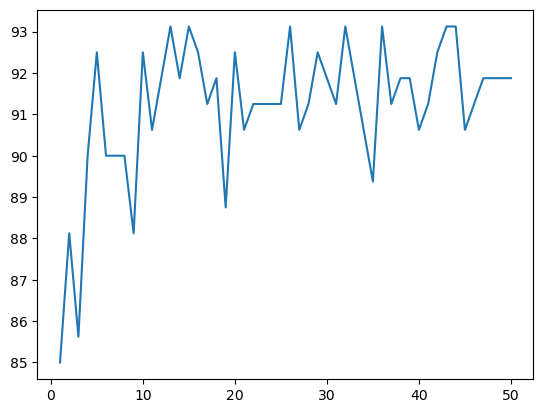

In [67]:
sns.lineplot(x=range(1,51), y=scorq)


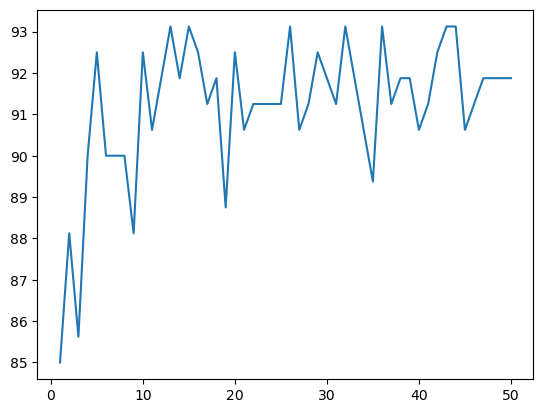

In [68]:
plt.plot(range(1,51),scorq)
plt.show()

In [76]:
#preditifve system
import numpy as np
ac=[7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8]

ac_as_array = np.asarray(ac)
rehsaped_ac_as_array = ac_as_array.reshape(1,-1)
d=model.predict(rehsaped_ac_as_array)
if d[0]==1:
    print('wine is high quality')
else:
    print('wine is average quality')

wine is high quality


C:\Users\TESTING\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
